In [18]:
# Libraries 
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import talib as ta
from statistics import stdev

In [2]:
infy = pd.read_csv("data/INFY_1YR.csv", thousands=",")
infy

,Date,series,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No of trades
0,26-Dec-2023,EQ,1535.00,1548.00,1523.00,1562.90,1546.00,1543.95,1539.75,1619.75,1185.3,6878067,1.059051e+10,306708
1,22-Dec-2023,EQ,1534.95,1566.00,1523.00,1536.00,1560.60,1562.90,1544.96,1619.75,1185.3,6741060,1.041466e+10,248721
2,21-Dec-2023,EQ,1521.25,1546.65,1521.25,1536.40,1540.05,1536.00,1536.05,1619.75,1185.3,5319038,8.170301e+09,234678
3,20-Dec-2023,EQ,1565.05,1583.50,1530.00,1558.30,1531.00,1536.40,1561.35,1619.75,1185.3,6592367,1.029301e+10,313361
4,19-Dec-2023,EQ,1570.10,1573.95,1543.25,1564.35,1555.00,1558.30,1557.15,1619.75,1185.3,4221721,6.573863e+09,164124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,02-Jan-2023,EQ,1514.00,1526.50,1504.05,1508.20,1524.40,1524.00,1518.62,1953.90,1355.0,3801140,5.772496e+09,103834
243,30-Dec-2022,EQ,1528.00,1530.40,1504.05,1517.55,1508.60,1508.20,1518.27,1953.90,1355.0,5060544,7.683272e+09,123954
244,29-Dec-2022,EQ,1504.00,1521.30,1501.00,1510.15,1519.00,1517.55,1511.51,1953.90,1355.0,4624745,6.990343e+09,116090
245,28-Dec-2022,EQ,1505.10,1524.95,1498.50,1514.85,1510.00,1510.15,1510.98,1953.90,1355.0,5029860,7.600017e+09,138568


In [3]:
infy.columns = infy.columns.str.replace(' ','')

In [4]:
infy.columns

Index(['Date', 'series', 'OPEN', 'HIGH', 'LOW', 'PREV.CLOSE', 'ltp', 'close',
       'vwap', '52WH', '52WL', 'VOLUME', 'VALUE', 'Nooftrades'],
      dtype='object')

In [5]:
data = infy.loc[:,['Date', 'close']]
data

,Date,close
0,26-Dec-2023,1543.95
1,22-Dec-2023,1562.90
2,21-Dec-2023,1536.00
3,20-Dec-2023,1536.40
4,19-Dec-2023,1558.30
...,...,...
242,02-Jan-2023,1524.00
243,30-Dec-2022,1508.20
244,29-Dec-2022,1517.55
245,28-Dec-2022,1510.15


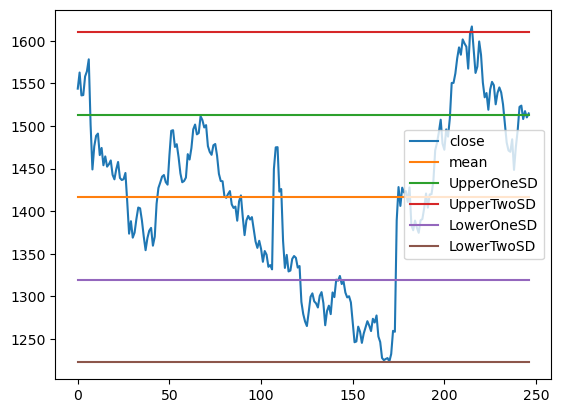

In [27]:
data.plot();

In [26]:
data

,Date,close,mean,UpperOneSD,UpperTwoSD,LowerOneSD,LowerTwoSD
0,26-Dec-2023,1543.95,1416.331174,1513.399531,1610.467887,1319.262817,1222.194461
1,22-Dec-2023,1562.90,1416.331174,1513.399531,1610.467887,1319.262817,1222.194461
2,21-Dec-2023,1536.00,1416.331174,1513.399531,1610.467887,1319.262817,1222.194461
3,20-Dec-2023,1536.40,1416.331174,1513.399531,1610.467887,1319.262817,1222.194461
4,19-Dec-2023,1558.30,1416.331174,1513.399531,1610.467887,1319.262817,1222.194461
...,...,...,...,...,...,...,...
242,02-Jan-2023,1524.00,1416.331174,1513.399531,1610.467887,1319.262817,1222.194461
243,30-Dec-2022,1508.20,1416.331174,1513.399531,1610.467887,1319.262817,1222.194461
244,29-Dec-2022,1517.55,1416.331174,1513.399531,1610.467887,1319.262817,1222.194461
245,28-Dec-2022,1510.15,1416.331174,1513.399531,1610.467887,1319.262817,1222.194461


In [25]:
data['mean'] = data.close.mean()
data['UpperOneSD'] = data.close.mean()+stdev(data.close)
data['UpperTwoSD'] = data.close.mean()+(stdev(data.close)*2)
data['LowerOneSD'] = data.close.mean()-stdev(data.close)
data['LowerTwoSD'] = data.close.mean()-(stdev(data.close)*2)

In [20]:
np.std(data.close)

96.87166266858523

In [21]:
np.mean(data.close)

1416.3311740890688

In [24]:


data.close.mean()+ stdev(data.close)


1513.3995306914856